In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Example of Bode Plots for Continuous Time Filter defined by linear, constant coefficient, differential equations

In [10]:

def bode_plot(w, H, w_co=None, y_low=-90, y_high=2, title='bode plot'):
    
    fig, ax = plt.subplots(2, figsize=(8, 8))

    ax[0].plot(w, 20 * np.log10(abs(H)), color = 'b', label='$|H(j \omega)|$ (dB)')
    ax[0].semilogx()
    ax[0].legend()
    ax[0].grid(linestyle=':')
    ax[0].set_ylim([y_low, y_high])
    ax[0].set_ylabel(f'filter gain (dB)')
    ax[0].set_title(title)
    if w_co is not None:
        ax[0].axvline(x=w_co, c='r', linestyle='--')

    ax[1].plot(w, np.unwrap(np.angle(H)) * 180 / np.pi, color = 'g', label='angle $H(j \omega)$ (degrees)')
    ax[1].semilogx()
    ax[1].grid(linestyle=':')
    ax[1].legend()
    ax[1].set_ylabel(f'Angle (degrees)')
    if w_co is not None:
        ax[1].axvline(x=w_co, c='r', linestyle='--')
    ax[1].set_xlabel(f'frequency ($\omega$) (rad/sec)')


A Butterworth filter is just a specific design for the a and b vectors with H(jw) = N(jw) / D(jw); N(jw) and D(jw) being polynomials in (jw) -- note that for CT, use `Analog=True`

In [7]:
omega_c = 2 * np.pi * 1e4
b, a = signal.butter(4, omega_c, 'low', analog=True)

We can use [scipy.signal.freqs](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.freqs.html) to generate (w, H(jw)) easily, given a, b vectors.  This is the CT version of freqz which works for ARMA DT filters.

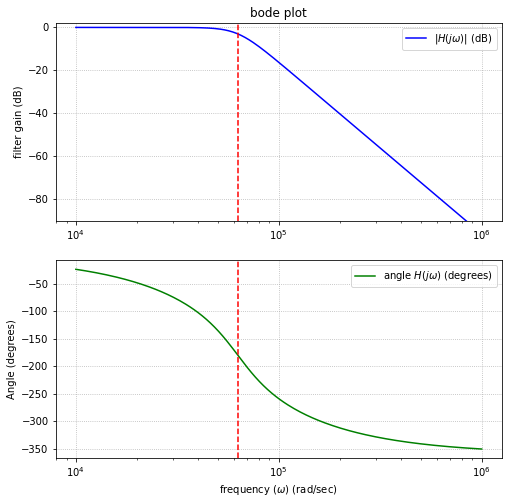

In [11]:
w, H = signal.freqs(b, a)
bode_plot(w, H, w_co=omega_c)